<a href="https://colab.research.google.com/github/gonzaloelejalde/piii-2025/blob/main/clase03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

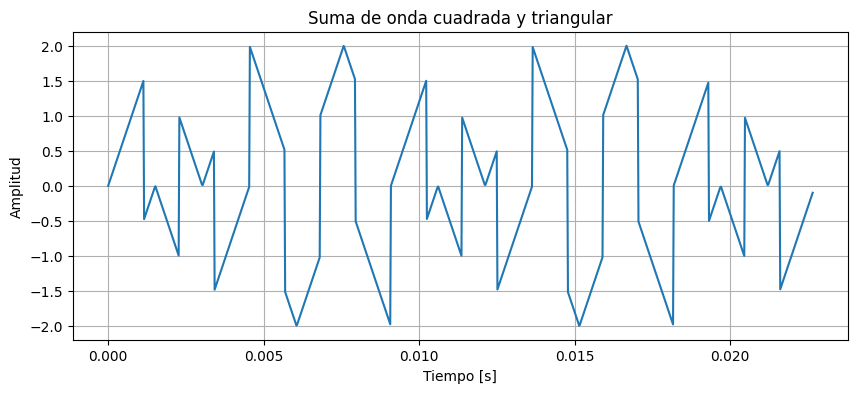

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

# Parámetros
sample_rate = 44100  # Hz
duracion = 2         # segundos
t = np.linspace(0, duracion, sample_rate * duracion, endpoint=False)

# Señal cuadrada y triangular
freq_square = 440   # Hz
freq_triangle = 330 # Hz
amplitud = 1

square_wave = amplitud * signal.square(2 * np.pi * freq_square * t)
triangle_wave = amplitud * signal.sawtooth(2 * np.pi * freq_triangle * t, 0.5)

# Sumar señales
combined_wave = square_wave + triangle_wave

# Gráfica
plt.figure(figsize=(10,4))
plt.plot(t[:1000], combined_wave[:1000])  # mostrar primeros 1000 puntos
plt.title("Suma de onda cuadrada y triangular")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# Reproducir
Audio(combined_wave, rate=sample_rate)


In [ ]:
def cuantizar(señal, bits, Vref_pos=1, Vref_neg=-1):
    niveles = 2**bits
    señal_clipped = np.clip(señal, Vref_neg, Vref_pos)
    señal_normalizada = (señal_clipped - Vref_neg) / (Vref_pos - Vref_neg)
    señal_cuantizada = np.round(señal_normalizada * (niveles - 1))
    señal_cuantizada = señal_cuantizada / (niveles - 1) * (Vref_pos - Vref_neg) + Vref_neg
    return señal_cuantizada


Ejercicio 5 con la generacion de la onda y la cuantización


Cantidad de bits del codificador: 4
Voltaje máximo (Vref+): 2
Voltaje mínimo (Vref-): -2


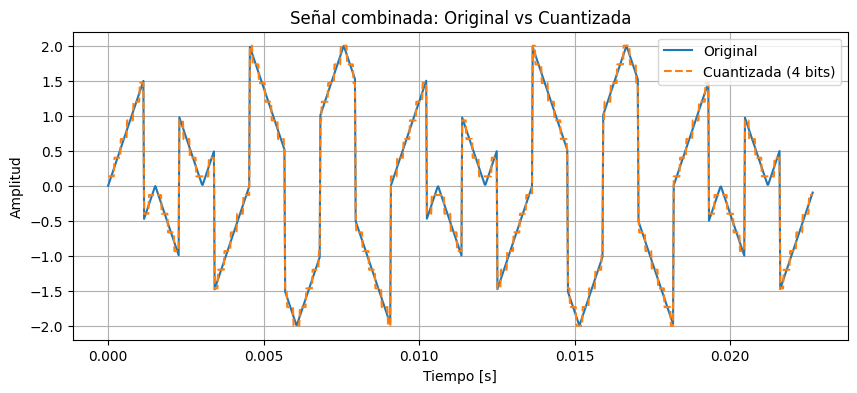

Audio original:


Audio cuantizado (4 bits):


In [ ]:
# EJERCICIO 5 COMPLETO E INTERACTIVO
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# ===== 1️⃣ Parámetros de la señal =====
sample_rate = 44100   # Hz
duracion = 1          # segundos
t = np.linspace(0, duracion, sample_rate * duracion, endpoint=False)
amplitud = 1

freq_square = 440     # Hz
freq_triangle = 330   # Hz

# ===== 2️⃣ Generar señales =====
square_wave = amplitud * signal.square(2 * np.pi * freq_square * t)
triangle_wave = amplitud * signal.sawtooth(2 * np.pi * freq_triangle * t, 0.5)

# ===== 3️⃣ Sumar señales =====
combined_wave = square_wave + triangle_wave

# ===== 4️⃣ Función de cuantización =====
def cuantizar(señal, bits, Vref_pos=1, Vref_neg=-1):
    niveles = 2**bits
    señal_clipped = np.clip(señal, Vref_neg, Vref_pos)
    señal_normalizada = (señal_clipped - Vref_neg) / (Vref_pos - Vref_neg)
    señal_cuantizada = np.round(señal_normalizada * (niveles - 1))
    señal_cuantizada = señal_cuantizada / (niveles - 1) * (Vref_pos - Vref_neg) + Vref_neg
    return señal_cuantizada

# ===== 5️⃣ Inputs interactivos =====
bits = int(input("Cantidad de bits del codificador: "))
Vref_pos = float(input("Voltaje máximo (Vref+): "))
Vref_neg = float(input("Voltaje mínimo (Vref-): "))

# ===== 6️⃣ Cuantizar la señal =====
cuantizada = cuantizar(combined_wave, bits=bits, Vref_pos=Vref_pos, Vref_neg=Vref_neg)

# ===== 7️⃣ Graficar =====
plt.figure(figsize=(10,4))
plt.plot(t[:1000], combined_wave[:1000], label="Original")
plt.plot(t[:1000], cuantizada[:1000], linestyle="--", label=f"Cuantizada ({bits} bits)")
plt.title("Señal combinada: Original vs Cuantizada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()

# ===== 8️⃣ Reproducir audio =====
print("Audio original:")
display(Audio(combined_wave, rate=sample_rate))

print(f"Audio cuantizado ({bits} bits):")
display(Audio(cuantizada, rate=sample_rate))


Código de prueba del profe

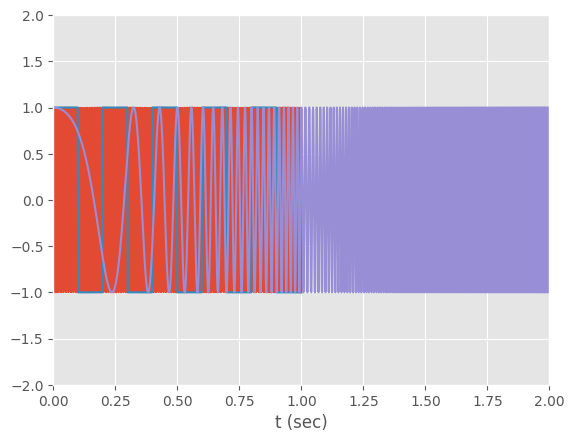

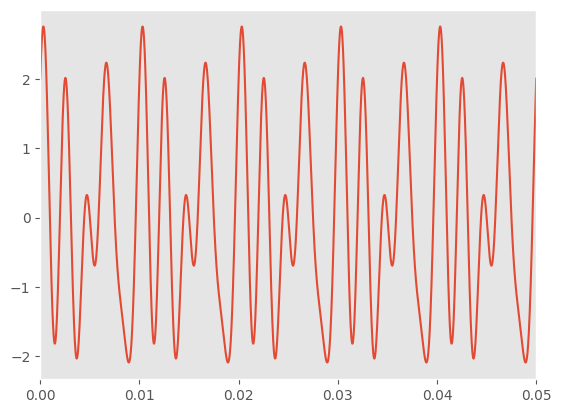

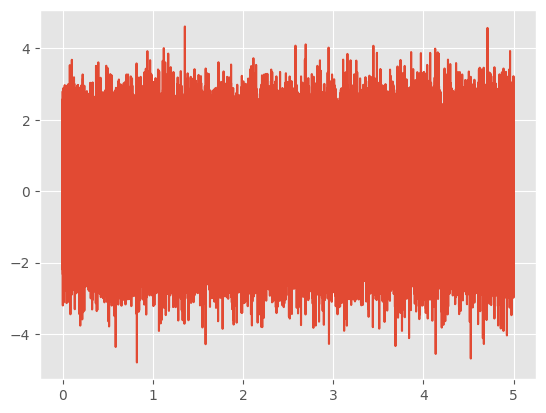

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
from scipy import signal

# Para reproducir audio en la notebook.
from IPython.display import Audio, display

# ===== Señal triangular =====
sample_rate = 44100
duracion = 1
n = np.linspace(0, duracion, sample_rate * duracion)
plt.xlim([0, 0.005])
triangle = signal.sawtooth(2 * np.pi * 800 * n, 0.5)
plt.plot(n, triangle)

# ===== Señal cuadrada =====
n = np.linspace(0, 1, 500, endpoint=False)
square = signal.square(2 * np.pi * 5 * n)
plt.plot(n, square)
plt.ylim(-2, 2)

# ===== Señal chirp =====
n = np.linspace(0, 5, 44100 * 5)
w = signal.chirp(n, f0=1, f1=1500, t1=5, method='quadratic')
plt.plot(n, w)
plt.xlim([0, 2])
plt.xlabel('t (sec)')
plt.show()

Audio(w, rate=44100)

# ===== Armar señal compleja con senos y cosenos =====
def cosenoidal(frecuencia, duracion, sample_rate, A=1):
    n = np.linspace(0, duracion, sample_rate * duracion)
    return A * np.cos(2 * np.pi * frecuencia * n)

def generador_de_tono(frecuencia, duracion, sample_rate, A=1):
    n = np.linspace(0, duracion, sample_rate * duracion)
    return A * np.sin(2 * np.pi * frecuencia * n)

cos_1 = cosenoidal(300, 5, 44100)
cos_2 = cosenoidal(400, 5, 44100)
sin_1 = generador_de_tono(500, 5, 44100)
sin_2 = generador_de_tono(200, 5, 44100)
suma_de_senales = cos_1 + cos_2 + sin_1 + sin_2

plt.figure()
t = np.linspace(0, 5, 44100 * 5)
plt.plot(t, suma_de_senales)
plt.xlim([0, 0.05])
plt.grid()
plt.show()

Audio(suma_de_senales, rate=44100)

# ===== Ruido gaussiano =====
mean = 0
std = 1
sample_rate = 44100
duracion = 5
num_samples = duracion * sample_rate  # corregido
noise = np.random.normal(mean, std, size=num_samples)
x = np.linspace(0, duracion, num_samples)
plt.plot(x, noise)
plt.show()

Audio(0.5 * noise, rate=sample_rate)  # corregido

# ===== Suma de seno con ruido =====
sin_noise = sin_1 + noise
Audio(sin_noise, rate=sample_rate)


Ejercicio 6

In [10]:
from IPython.display import display, Javascript
from google.colab import output
import base64

# Código JavaScript para grabar en WebM (formato por defecto del navegador)
RECORD = """
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  let audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();

  // Tiempo de grabación (en ms) → 5000 = 5 segundos
  await new Promise(resolve => setTimeout(resolve, 5000));

  mediaRecorder.stop();

  await new Promise(resolve => {
    mediaRecorder.onstop = () => {
      const blob = new Blob(audioChunks, { type: 'audio/webm' });
      const reader = new FileReader();
      reader.readAsDataURL(blob);
      reader.onloadend = () => {
        const base64data = reader.result.split(',')[1];
        google.colab.kernel.invokeFunction('notebook.saveAudio', [base64data], {});
        resolve();
      };
    };
  });
}
recordAudio();
"""

# Función para guardar el audio como WebM
def save_audio(b64_audio):
    audio_bytes = base64.b64decode(b64_audio)
    with open("grabacion_440Hz.webm", "wb") as f:
        f.write(audio_bytes)
    print("🎤 Audio guardado como grabacion_440Hz.webm")

output.register_callback('notebook.saveAudio', save_audio)

display(Javascript(RECORD))


<IPython.core.display.Javascript object>

🎤 Audio guardado como grabacion_440Hz.webm


In [11]:
from pydub import AudioSegment

# Convertir WebM a WAV
sound = AudioSegment.from_file("grabacion_440Hz.webm", format="webm")
sound.export("grabacion_440Hz.wav", format="wav")

print("✅ Conversión lista: grabacion_440Hz.wav")



✅ Conversión lista: grabacion_440Hz.wav


In [ ]:
import IPython.display as ipd
ipd.Audio("grabacion_440Hz.wav")


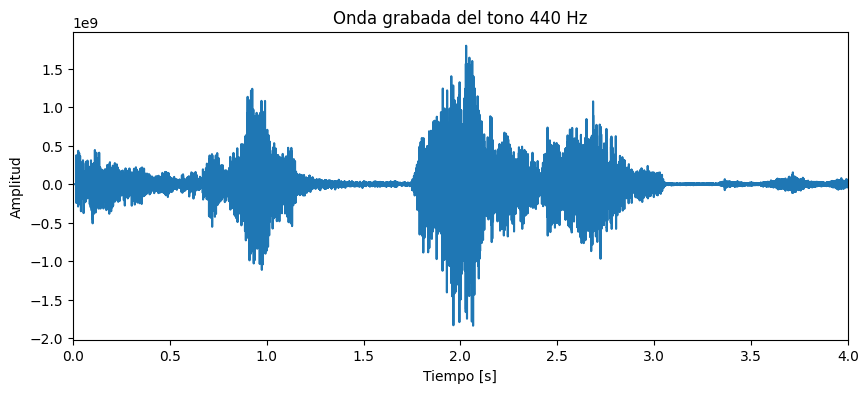

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

fs, data = wav.read("grabacion_440Hz.wav")

# Si es estéreo, usamos un solo canal
if data.ndim > 1:
    data = data[:,0]

plt.figure(figsize=(10,4))
plt.plot(np.arange(len(data))/fs, data)
plt.xlim(0, 4)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Onda grabada del tono 440 Hz")
plt.show()


Piano 440Hz

In [13]:
from IPython.display import display, Javascript
from google.colab import output
import base64

# Código JS para grabar
RECORD = """
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  let audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();

  // Tiempo de grabación (5 segundos)
  await new Promise(resolve => setTimeout(resolve, 5000));

  mediaRecorder.stop();

  await new Promise(resolve => {
    mediaRecorder.onstop = () => {
      const blob = new Blob(audioChunks, { type: 'audio/webm' });
      const reader = new FileReader();
      reader.readAsDataURL(blob);
      reader.onloadend = () => {
        const base64data = reader.result.split(',')[1];
        google.colab.kernel.invokeFunction('notebook.saveAudio', [base64data], {});
        resolve();
      };
    };
  });
}
recordAudio();
"""

def save_audio(b64_audio):
    audio_bytes = base64.b64decode(b64_audio)
    with open("piano_A4.webm", "wb") as f:
        f.write(audio_bytes)
    print("🎹 Audio guardado como piano_A4.webm")

output.register_callback('notebook.saveAudio', save_audio)

display(Javascript(RECORD))


<IPython.core.display.Javascript object>

🎹 Audio guardado como piano_A4.webm


In [14]:
from pydub import AudioSegment

sound = AudioSegment.from_file("piano_A4.webm", format="webm")
sound.export("piano_A4.wav", format="wav")

print("✅ Conversión lista: piano_A4.wav")


✅ Conversión lista: piano_A4.wav


In [15]:
import IPython.display as ipd
ipd.Audio("piano_A4.wav")


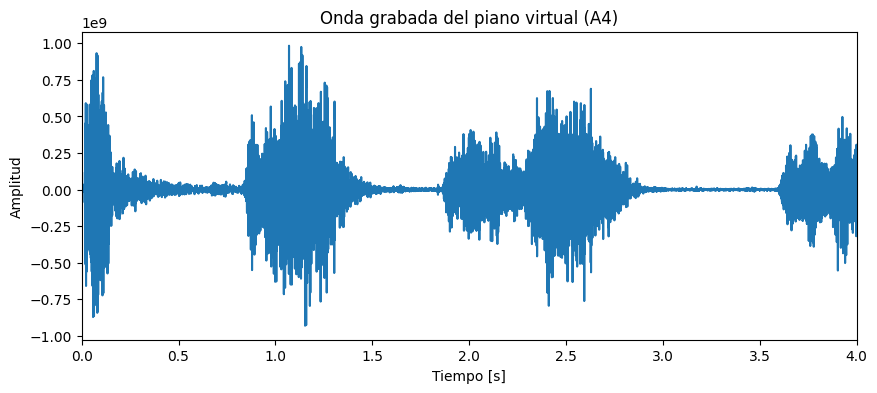

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

fs, data = wav.read("piano_A4.wav")

if data.ndim > 1:
    data = data[:,0]

plt.figure(figsize=(10,4))
plt.plot(np.arange(len(data))/fs, data)
plt.xlim(0, 4)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Onda grabada del piano virtual (A4)")
plt.show()


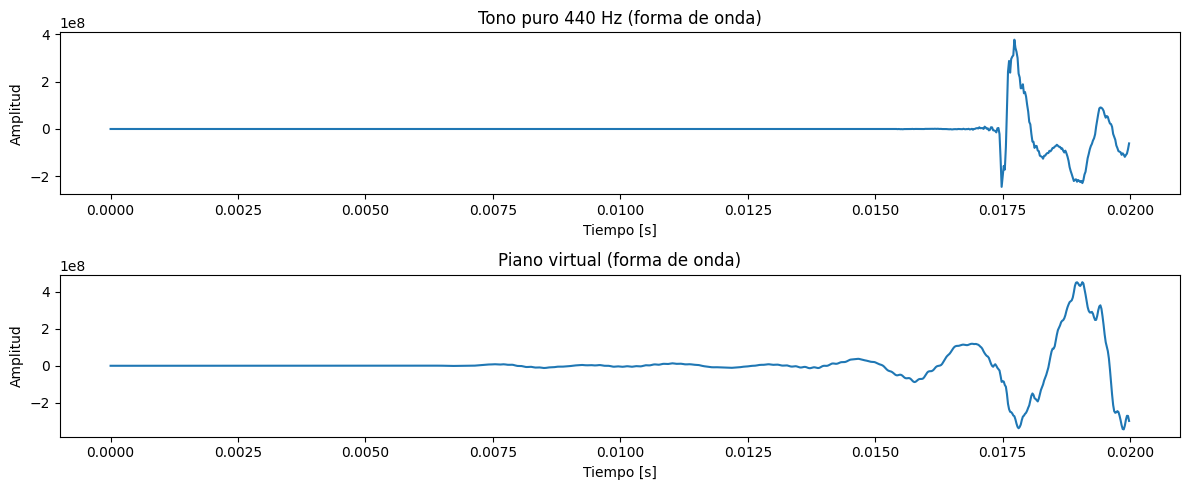

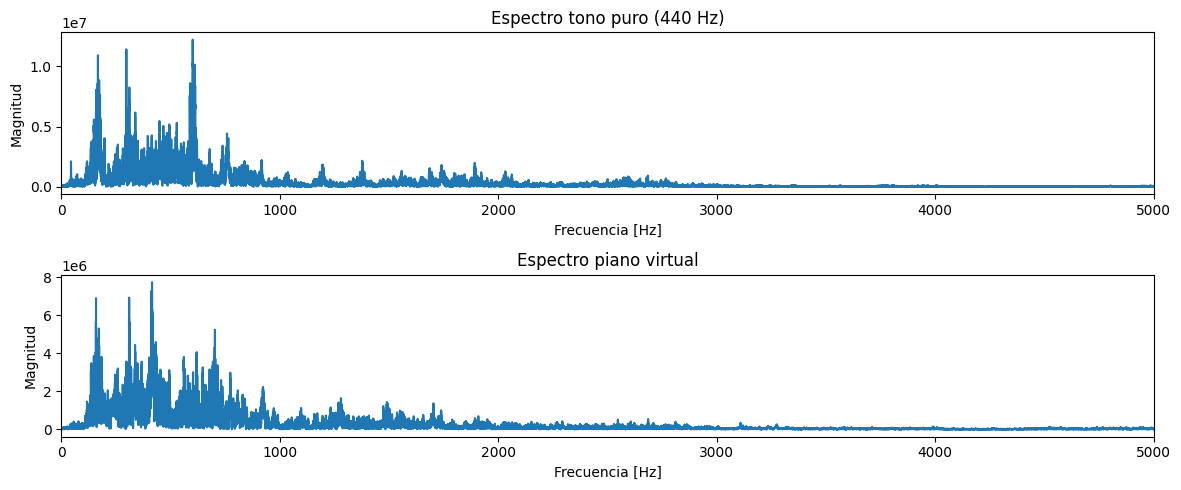

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Cargar los audios
fs1, data1 = wav.read("grabacion_440Hz.wav")   # tu grabación del generador online
fs2, data2 = wav.read("piano_A4.wav")     # tu grabación del piano virtual

# Normalizar a mono si son estéreo
if data1.ndim > 1:
    data1 = data1[:,0]
if data2.ndim > 1:
    data2 = data2[:,0]

# --- Formas de onda ---
t1 = np.arange(len(data1)) / fs1
t2 = np.arange(len(data2)) / fs2

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(t1[:int(fs1*0.02)], data1[:int(fs1*0.02)])
plt.title("Tono puro 440 Hz (forma de onda)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(2,1,2)
plt.plot(t2[:int(fs2*0.02)], data2[:int(fs2*0.02)])
plt.title("Piano virtual (forma de onda)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

# --- Espectros ---
def plot_fft(data, fs, title):
    N = len(data)
    freqs = np.fft.rfftfreq(N, 1/fs)
    spectrum = np.abs(np.fft.rfft(data)) / N
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud")
    plt.xlim(0, 5000)  # ver hasta 5 kHz

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plot_fft(data1, fs1, "Espectro tono puro (440 Hz)")
plt.subplot(2,1,2)
plot_fft(data2, fs2, "Espectro piano virtual")
plt.tight_layout()
plt.show()


Tono puro (generador online): En la forma de onda se ve una sinusoide limpia y estable. En el espectro aparece un solo pico en 440 Hz (frecuencia fundamental), con muy poca energía en otras frecuencias.

Piano virtual: En la forma de onda ya no es sinusoidal, tiene una forma más compleja debido a los armónicos. En el espectro aparece un pico en 440 Hz, pero además varios picos adicionales en múltiplos de 440 Hz (880 Hz, 1320 Hz, etc.) → estos son los armónicos que le dan el timbre característico al piano.

También puede observarse que la amplitud del sonido del piano decayó con el tiempo, a diferencia del tono puro que se mantiene constante.

Ejercicio 7

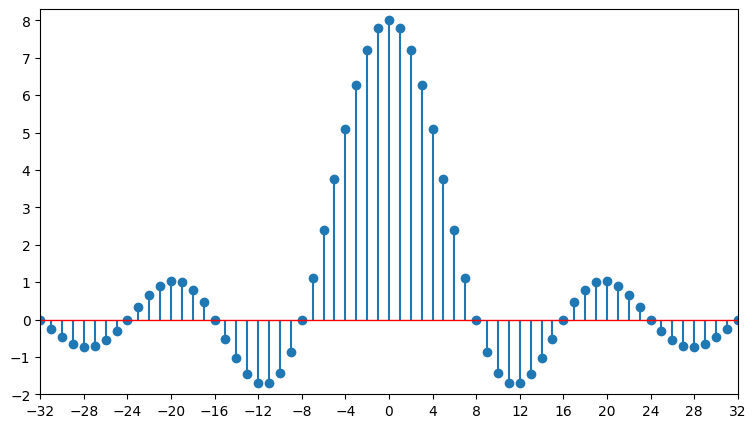

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- parámetros ---
A     = 8.0     # amplitud del pico central
M     = 8       # ceros de la sinc en n = ±8, ±16, ...
NMAX  = 32      # rango de muestras a graficar

# eje discreto y señal
n = np.arange(-NMAX, NMAX + 1, 1)
x = A * np.sinc(n / M)   # np.sinc(x) = sin(pi*x)/(pi*x)

# --- gráfico tipo stem + línea base roja ---
plt.figure(figsize=(9, 5))
markerline, stemlines, baseline = plt.stem(n, x)
plt.setp(baseline, color='r', linewidth=1)     # línea y=0 en rojo
plt.setp(markerline, markersize=6)

# estilo para que se vea como en la consigna
plt.xlim(-NMAX, NMAX)
plt.ylim(-2, 8.3)
plt.xticks(np.arange(-32, 33, 4))
plt.yticks(np.arange(-2, 9, 1))
plt.grid(False)               # sin grilla
plt.xlabel("")                # sin etiquetas extra
plt.ylabel("")

plt.show()